In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
X = stats.binom.rvs(50, 0.7, size=5000)

In [3]:
X.min(), X.max(), np.quantile(X, 0.25), np.quantile(X, 0.5), np.quantile(X, 0.75)

(22, 47, 33.0, 35.0, 37.0)

C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


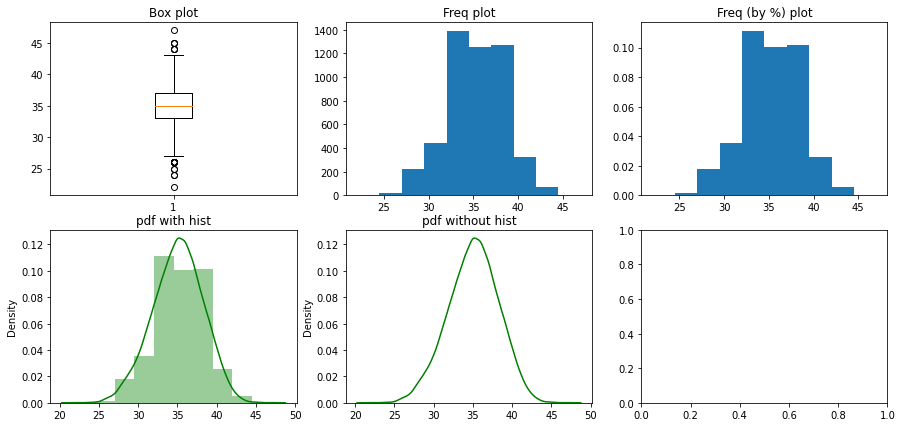

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

axes[0, 0].boxplot(X)
axes[0, 0].set_title("Box plot")

axes[0, 1].hist(X, bins=10)
axes[0, 1].set_title("Freq plot")

axes[0, 2].hist(X, density=True)
axes[0, 2].set_title("Freq (by %) plot")

sns.distplot(X, ax=axes[1, 0], color='g', bins=10)
axes[1, 0].set_title('pdf with hist')

sns.distplot(X, ax=axes[1, 1],color='g', bins=10, hist=False)
axes[1, 1].set_title('pdf without hist')
# fig.suptitle("X")

plt.show()

# Exercise 02

In [5]:
mean = np.array([165, 55])
cov = np.array([[100, 0.4],
                [0.4, 36]])

height, weight = np.random.multivariate_normal(mean, cov, size=5000).T

In [6]:
height, weight = height.astype(np.int16), weight.astype(np.int16)

In [7]:
height.min(), height.max(), np.quantile(height, 0.25), np.quantile(height, 0.5), np.quantile(height, 0.75)

(122, 212, 158.0, 165.0, 171.0)

In [8]:
weight.min(), weight.max(), np.quantile(weight, 0.25), np.quantile(weight, 0.5), np.quantile(weight, 0.75)

(33, 77, 50.0, 54.0, 59.0)

C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


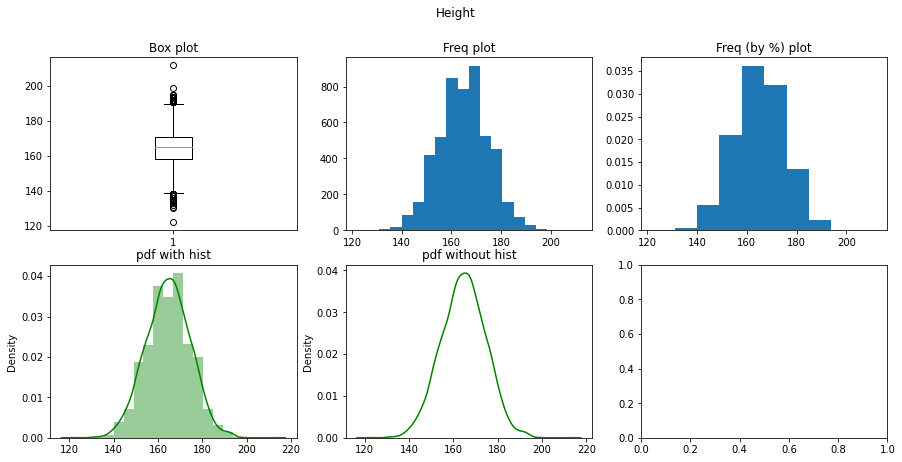

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

axes[0, 0].boxplot(height)
axes[0, 0].set_title("Box plot")

axes[0, 1].hist(height, bins=20)
axes[0, 1].set_title("Freq plot")

axes[0, 2].hist(height, density=True)
axes[0, 2].set_title("Freq (by %) plot")

sns.distplot(height, ax=axes[1, 0], color='g', bins=20)
axes[1, 0].set_title('pdf with hist')

sns.distplot(height, ax=axes[1, 1],color='g', bins=20, hist=False)
axes[1, 1].set_title('pdf without hist')
fig.suptitle("Height")

plt.show()

C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


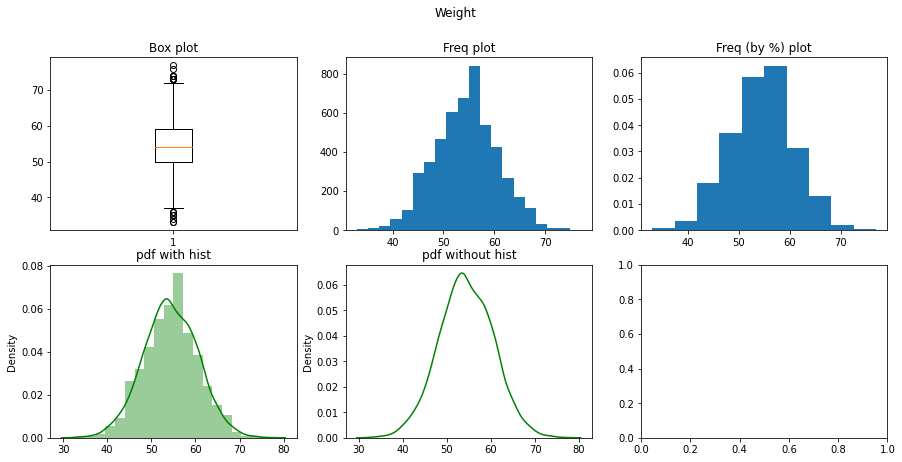

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

axes[0, 0].boxplot(weight)
axes[0, 0].set_title("Box plot")

axes[0, 1].hist(weight, bins=20)
axes[0, 1].set_title("Freq plot")

axes[0, 2].hist(weight, density=True)
axes[0, 2].set_title("Freq (by %) plot")

sns.distplot(weight, ax=axes[1, 0], color='g', bins=20)
axes[1, 0].set_title('pdf with hist')

sns.distplot(weight, ax=axes[1, 1],color='g', bins=20, hist=False)
axes[1, 1].set_title('pdf without hist')
fig.suptitle("Weight")

plt.show()

In [11]:
h_x, h_n = np.unique(height, return_counts=True)
w_x, w_n = np.unique(weight, return_counts=True)

In [12]:
h_x = sorted(h_x)
w_x = sorted(w_x)

In [13]:
n = len(height)
jpmf = np.zeros((len(h_x), len(w_x)))
for i,hx1 in enumerate(h_x):
    dc1 = {}
    for wx1 in w_x:
        dc1[wx1] = 0
    
    for k in range(n):
        if height[k] == hx1:
            dc1[weight[k]] += 1
    for j,wx1 in enumerate(w_x):
        jpmf[i,j] = float(dc1[wx1]/n)

In [14]:
pmfx = np.sum(jpmf, axis=1)
pmfy = np.sum(jpmf, axis=0)

In [15]:
X, Y = np.meshgrid(h_x, w_x)

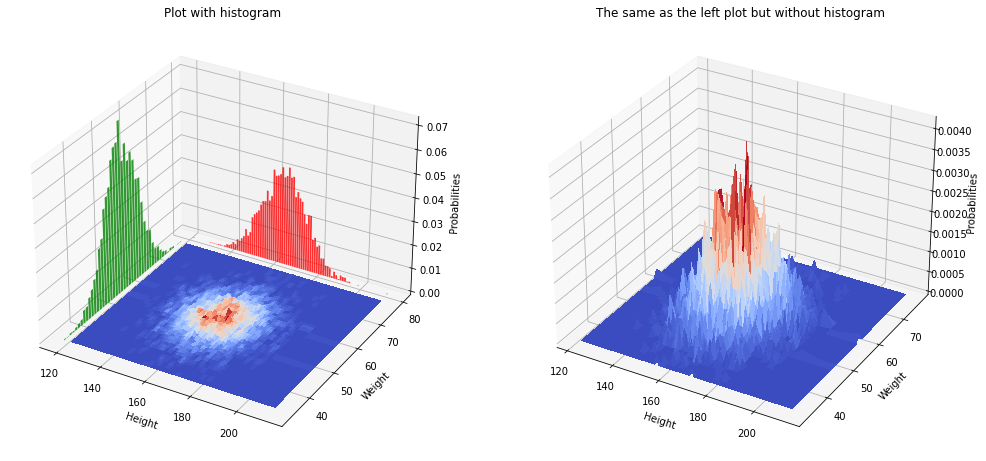

In [16]:
fig = plt.figure(figsize=(17, 17))

ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(X, Y, jpmf.T, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.bar(h_x, pmfx, zs = max(w_x) + 3, zdir = 'y', color='r', alpha=0.8)
ax.bar(w_x, pmfy, zs = min(h_x) - 3, zdir = 'x', color='g', alpha=0.8)
# ax.set_zlim(-1.01, 1.01)
# fig.colorbar(surf, shrink=0.1, aspect=12)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Probabilities')
ax.set_title("Plot with histogram")

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, jpmf.T, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# sns.distplot(weight, ax=ax[0, 1],color='g', bins=10, hist=False)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Probabilities')
ax.set_title("The same as the left plot but without histogram")
# fig.colorbar(surf, shrink=0.1, aspect=12)
plt.show()

C:\Users\thanhpv21\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


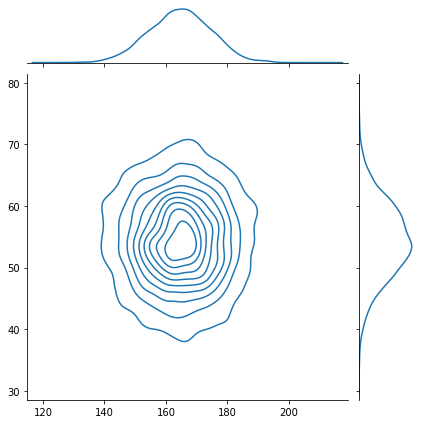

In [40]:
sns.jointplot(height, weight, kind='kde')